In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/jumia-phones-data.csv')
df.head()

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings
0,Jumia Nigeria,IPhone 12 Pro Max,880000,Average,150.0,Cryztal Accessories,Excellent,86,Excellent,8 units left,0
1,Jumia Nigeria,IPhone 15 Pro Max,1950000,Good,2127.0,Lamisol Gadgets,Excellent,94,Excellent,In stock,0
2,Jumia Express,IPHONE 12 PRO,650000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,3
3,Jumia Global,iPhone 5,44550 - 63985,NaN,20.0,Figer,NaN,98,Excellent,In stock,0
4,Jumia Express,IPhone X,400000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,0


In [3]:
df.tail()

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings
488,Jumia Nigeria,IPhone 14 Pro Max,1550000,Average,582.0,BEST CLASS STORES,Excellent,86,Excellent,8 units left,0
489,Jumia Express,IPhone X,450000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,1
490,Jumia Nigeria,IPhone 14 Pro Max,1550000,Average,582.0,BEST CLASS STORES,Excellent,86,Excellent,5 units left,0
491,Jumia Nigeria,IPhone 13 Pro,950000,Average,582.0,BEST CLASS STORES,Excellent,86,Excellent,In stock,1
492,Jumia Nigeria,IPhone 15 Pro Max,1998900,Excellent,132.0,VEE HUB,Excellent,94,Good,1 units left,0


In [4]:
# Trying to understand my data
df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   delivery_type           493 non-null    object 
 1   phone_name              493 non-null    object 
 2   phone_price             493 non-null    object 
 3   seller_customer_rating  292 non-null    object 
 4   seller_followers        420 non-null    float64
 5   seller_name             493 non-null    object 
 6   seller_quality_score    378 non-null    object 
 7   seller_score            493 non-null    int64  
 8   seller_shipping_speed   397 non-null    object 
 9   units_left              493 non-null    object 
 10  verified_ratings        493 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 42.5+ KB


In [6]:
# Note, 4 columns seller_customer_rating, seller_followers, seller_quality_score, seller_shipping_speed all have null columns
# Let me do data cleaning columns bt columns first.
# Columns 1. Delivery Type

In [7]:
df['delivery_type'].isnull().sum()

0

No null Values, proceeding to check for unique counts of the different categorical values

In [8]:
df['delivery_type'].unique()

array(['Jumia Nigeria', 'Jumia Express', 'Jumia Global'], dtype=object)

Time to isolate data only containing iphone data

In [9]:
df['phone_name'] = df['phone_name'].str.lower()
new_df = df[df['phone_name'].str.contains('iphone')].copy()
new_df.head()

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings
0,Jumia Nigeria,iphone 12 pro max,880000,Average,150.0,Cryztal Accessories,Excellent,86,Excellent,8 units left,0
1,Jumia Nigeria,iphone 15 pro max,1950000,Good,2127.0,Lamisol Gadgets,Excellent,94,Excellent,In stock,0
2,Jumia Express,iphone 12 pro,650000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,3
3,Jumia Global,iphone 5,44550 - 63985,NaN,20.0,Figer,NaN,98,Excellent,In stock,0
4,Jumia Express,iphone x,400000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,0


## Dealing with duplicate values

In [10]:
print(f" There are {new_df.duplicated().sum()} duplicated rows")

 There are 109 duplicated rows


In [11]:
new_df[new_df.duplicated()]

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings
44,Jumia Nigeria,iphone x,760000,Average,881.0,CHRIS COMMUNICATIONS TECHNOLOGY,Excellent,80,Good,In stock,0
57,Jumia Nigeria,iphone 13,790000,Average,881.0,CHRIS COMMUNICATIONS TECHNOLOGY,Excellent,80,Good,In stock,2
60,Jumia Nigeria,iphone 12 pro,760000,Average,582.0,BEST CLASS STORES,Excellent,86,Excellent,8 units left,0
65,Jumia Nigeria,iphone x,760000,Average,309.0,Don Chris Links,Very Poor,46,Good,In stock,0
78,Jumia Nigeria,iphone x,760000,Average,881.0,CHRIS COMMUNICATIONS TECHNOLOGY,Excellent,80,Good,In stock,0
...,...,...,...,...,...,...,...,...,...,...,...
464,Jumia Nigeria,iphone 14 pro max,1490000,Average,582.0,BEST CLASS STORES,Excellent,86,Excellent,In stock,0
471,Jumia Nigeria,iphone 11 pro,596999,NaN,4.0,Simple Gadget,NaN,60,NaN,In stock,0
475,Jumia Nigeria,iphone 14 pro,1380000,Average,582.0,BEST CLASS STORES,Excellent,86,Excellent,In stock,0
479,Jumia Nigeria,iphone x,760000,Average,881.0,CHRIS COMMUNICATIONS TECHNOLOGY,Excellent,80,Good,In stock,0


In [12]:
# Let's drop the duplicates rows
new_df = new_df.drop_duplicates()

In [13]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings'],
      dtype='object')

In [14]:
new_df.head()

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings
0,Jumia Nigeria,iphone 12 pro max,880000,Average,150.0,Cryztal Accessories,Excellent,86,Excellent,8 units left,0
1,Jumia Nigeria,iphone 15 pro max,1950000,Good,2127.0,Lamisol Gadgets,Excellent,94,Excellent,In stock,0
2,Jumia Express,iphone 12 pro,650000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,3
3,Jumia Global,iphone 5,44550 - 63985,NaN,20.0,Figer,NaN,98,Excellent,In stock,0
4,Jumia Express,iphone x,400000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,0


In [15]:
new_df['phone_name'].str.strip().unique()

array(['iphone 12 pro max', 'iphone 15 pro max', 'iphone 12 pro',
       'iphone 5', 'iphone x', 'iphone 6', 'iphone 13',
       'iphone 11 pro max', 'iphone 14 pro max', 'iphone 13 pro max',
       'iphone 11', 'iphone 13 pro', 'iphone 12', 'iphone 14',
       'iphone 11 pro', 'iphone 14 pro', 'iphone 15 pro', 'iphone 15',
       'iphone12 pro max', 'iphone 7', 'iphone 15pro', 'iphone 8',
       'iphone 13pro', 'iphone se', 'iphone5'], dtype=object)

Time to work on the model names and standardize it.

In [16]:
test_models = new_df['phone_name']

In [17]:
new_test_models = []
for model in test_models:
  if model.startswith('iphone'):
    model = model[:6] + ' ' + model[6:]
  if 'pro' in model:
    model = model.replace('pro', ' pro ')
  model = model.replace("  ", " ").strip()
  new_test_models.append(model)

In [18]:
set(new_test_models)

{'iphone 11',
 'iphone 11 pro',
 'iphone 11 pro max',
 'iphone 12',
 'iphone 12 pro',
 'iphone 12 pro max',
 'iphone 13',
 'iphone 13 pro',
 'iphone 13 pro max',
 'iphone 14',
 'iphone 14 pro',
 'iphone 14 pro max',
 'iphone 15',
 'iphone 15 pro',
 'iphone 15 pro max',
 'iphone 5',
 'iphone 6',
 'iphone 7',
 'iphone 8',
 'iphone se',
 'iphone x'}

In [19]:
# Create a function and apply it to the column to standardize the model column name
def standardize_iphone_model(model):
    model = model.lower().replace(" ", "")
    if model.startswith("iphone"):
        model = model[:6] + " " + model[6:]
    if "pro" in model:
        model = model.replace("pro", " pro ")
    model = model.replace("  ", " ").strip()
    return model

In [20]:
new_df['model_names'] = new_df['phone_name'].apply(standardize_iphone_model)

In [21]:
new_df.head()

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
0,Jumia Nigeria,iphone 12 pro max,880000,Average,150.0,Cryztal Accessories,Excellent,86,Excellent,8 units left,0,iphone 12 pro max
1,Jumia Nigeria,iphone 15 pro max,1950000,Good,2127.0,Lamisol Gadgets,Excellent,94,Excellent,In stock,0,iphone 15 pro max
2,Jumia Express,iphone 12 pro,650000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,3,iphone 12 pro
3,Jumia Global,iphone 5,44550 - 63985,NaN,20.0,Figer,NaN,98,Excellent,In stock,0,iphone 5
4,Jumia Express,iphone x,400000,Excellent,191.0,BARGAIN PHONES & GADGET - AC,Excellent,100,Excellent,In stock,0,iphone x


In [22]:
new_df['model_names'].value_counts()

,count
model_names,
iphone x,37
iphone 11,36
iphone 12 pro max,25
iphone 13,21
iphone 8,16
iphone 6,16
iphone 15 pro max,15
iphone 12,14
iphone 13 pro max,14


In [23]:
new_df['model_names'].unique()

array(['iphone 12 pro max', 'iphone 15 pro max', 'iphone 12 pro',
       'iphone 5', 'iphone x', 'iphone 6', 'iphone 13',
       'iphone 11 pro max', 'iphone 14 pro max', 'iphone 13 pro max',
       'iphone 11', 'iphone 13 pro', 'iphone 12', 'iphone 14',
       'iphone 11 pro', 'iphone 14 pro', 'iphone 15 pro', 'iphone 15',
       'iphone 7', 'iphone 8', 'iphone se'], dtype=object)

In [24]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names'],
      dtype='object')

In [25]:
new_df[new_df['phone_price'].str.contains("-")]

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
3,Jumia Global,iphone 5,44550 - 63985,NaN,20.0,Figer,NaN,98,Excellent,In stock,0,iphone 5
7,Jumia Global,iphone 6,63969 - 91509,NaN,7.0,sellcome01,Very Poor,60,Excellent,In stock,2,iphone 6
37,Jumia Global,iphone 11,440277 - 510244,NaN,15.0,Xinheng,Excellent,90,Good,In stock,0,iphone 11


In [26]:
prices = new_df['phone_price']

In [27]:
average_price = []
for price in prices:
  if '-' in price:
    price.split('-')
    price = (float(price.split('-')[0]) + float(price.split('-')[1]))/2
    average_price.append(price)
  else:
    price =float(price.strip())
    average_price.append(price)

In [28]:
def clean_price(price):
  if '-' in price:
    price.split('-')
    price = (float(price.split('-')[0]) + float(price.split('-')[1]))/2
    return price
  else:
    return float(price.strip())

In [29]:
new_df['phone_price'] = new_df['phone_price'].apply(clean_price)

In [30]:
new_df['phone_price'].dtypes

dtype('float64')

In [31]:
new_df['phone_price'].describe()

,phone_price
count,2.850000e+02
mean,8.250599e+05
std,5.596406e+05
min,8.200000e+03
25%,4.402770e+05
50%,7.600000e+05
75%,9.800000e+05
max,2.850999e+06


Let's plot a scatter plot of model name and phone price, this would further help us see if there are any outliers in the price column

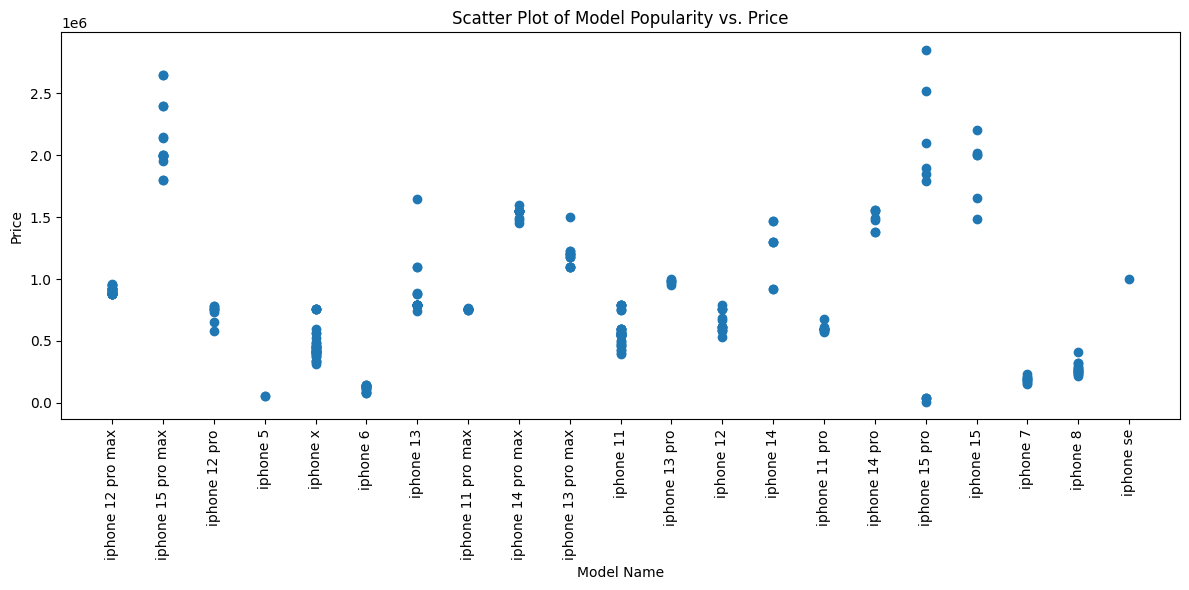

In [32]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(new_df['model_names'], new_df['phone_price'])
plt.xlabel('Model Name')
plt.ylabel('Price')
plt.title('Scatter Plot of Model Popularity vs. Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### CONTINUE HERE

In [33]:
new_df[(new_df['phone_price'] < 200000) & (new_df['model_names'].str.contains('15 pro'))]

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
122,Jumia Global,iphone 15pro,8200.0,NaN,NaN,Cat Happy Shop,Excellent,60,Poor,In stock,0,iphone 15 pro
246,Jumia Global,iphone 15pro,41587.0,NaN,NaN,XQY,NaN,60,NaN,In stock,0,iphone 15 pro
252,Jumia Global,iphone 15pro,41587.0,NaN,NaN,mzl,NaN,60,NaN,In stock,0,iphone 15 pro
267,Jumia Global,iphone 15pro,41587.0,NaN,NaN,CCZ,NaN,60,NaN,In stock,0,iphone 15 pro


In [34]:
# I do not think any iPhone 15 model goes for as low as 8,200 or even 41,587. SO I'd drop these columns.

In [35]:
# Makes no sense, so I'd be dropping that column
new_df = new_df.drop(new_df[(new_df['phone_price'] < 200000) & (new_df['model_names'].str.contains('15 pro'))].index)
# new_df = new_df.drop(new_df[new_df['phone_price'] == 8200].index)

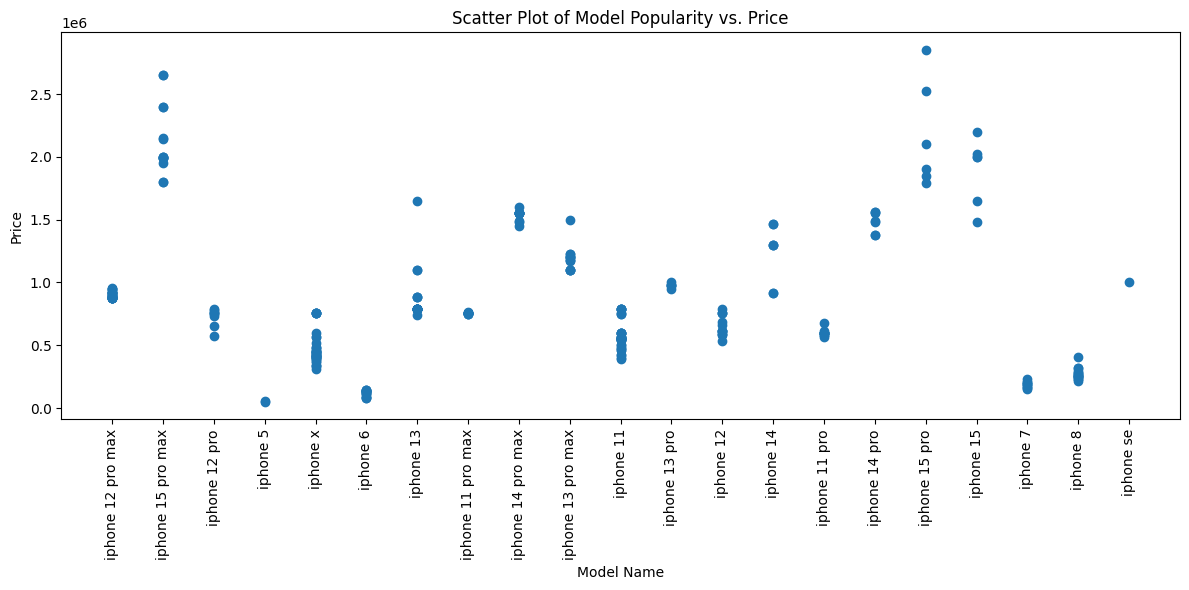

In [36]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(new_df['model_names'], new_df['phone_price'])
plt.xlabel('Model Name')
plt.ylabel('Price')
plt.title('Scatter Plot of Model Popularity vs. Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ok, the scatter plot is looking wayy better. Time to continue with the price

In [37]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names'],
      dtype='object')

In [38]:
new_df['seller_customer_rating'].unique()

array(['Average', 'Good', 'Excellent', nan, 'Poor'], dtype=object)

In [39]:
new_df['seller_customer_rating'] = new_df['seller_customer_rating'].fillna('No Rating yet')

In [40]:
new_df['seller_customer_rating'].unique()

array(['Average', 'Good', 'Excellent', 'No Rating yet', 'Poor'],
      dtype=object)

In [41]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names'],
      dtype='object')

In [42]:
print(new_df['seller_followers'].unique())
print(f"We have {new_df['seller_followers'].isnull().sum()} null values in this column")

[ 150. 2127.  191.   20. 2418.    7.  881.  293.  582.  349.  183.  203.
  309.   15.  751.  132.    5.   nan    4.   49.  153.]
We have 12 null values in this column


In [43]:
new_df['seller_followers'] = new_df['seller_followers'].astype(float).fillna(0).astype(int)
print(new_df['seller_followers'].unique())

[ 150 2127  191   20 2418    7  881  293  582  349  183  203  309   15
  751  132    5    0    4   49  153]


In [44]:
new_df['seller_followers'].dtype

dtype('int64')

In [45]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names'],
      dtype='object')

In [46]:
new_df['seller_name'] = new_df['seller_name'].str.capitalize()

In [47]:
new_df['seller_name'].unique()

array(['Cryztal accessories', 'Lamisol gadgets',
       'Bargain phones & gadget - ac', 'Figer',
       'Apple authorized reseller', 'Sellcome01',
       'Chris communications technology', 'Topman phones',
       'Best class stores', 'High class sotre', 'Kcros store-cod',
       'Unagi-cod', 'Don chris links', 'Xinheng', 'Mobile links77',
       'Vee hub', 'Arinjam apples and accessories', 'Okcat',
       'Simple gadget', 'Yusheng', 'Telecom links7', 'Huajie', 'Shengtu',
       'Fantacymall', 'Jumia', 'Figer01'], dtype=object)

In [48]:
new_df['seller_quality_score'].isna().sum()

46

In [49]:
new_df['seller_quality_score'].unique()

array(['Excellent', nan, 'Very Poor'], dtype=object)

In [50]:
new_df['seller_quality_score'] = new_df['seller_quality_score'].fillna("No score")

In [51]:
new_df['seller_quality_score'].unique()

array(['Excellent', 'No score', 'Very Poor'], dtype=object)

In [52]:
new_df['seller_shipping_speed'].unique()

array(['Excellent', 'Good', 'Average', 'Very Poor', nan], dtype=object)

In [53]:
new_df['seller_shipping_speed'] = new_df['seller_shipping_speed'].fillna('No Rating yet')

In [54]:
new_df['seller_shipping_speed'].unique()

array(['Excellent', 'Good', 'Average', 'Very Poor', 'No Rating yet'],
      dtype=object)

In [55]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names'],
      dtype='object')

In [56]:
new_df['units_left'].unique()

array(['8 units left', 'In stock', '3 units left', '1 units left',
       '4 units left', '6 units left', '2 units left', '5 units left',
       '9 units left', '7 units left',
       'Not deliverable to LEKKI-AJAH (SANGOTEDO)'], dtype=object)

In [57]:
def clean_units_left(text):
  if 'Not deliverable to LEKKI-AJAH (SANGOTEDO)' in text:
    return 'In stock'
  else:
    return text

new_df['units_left'] = new_df['units_left'].apply(clean_units_left)

In [58]:
new_df['units_left'].unique()

array(['8 units left', 'In stock', '3 units left', '1 units left',
       '4 units left', '6 units left', '2 units left', '5 units left',
       '9 units left', '7 units left'], dtype=object)

In [59]:
new_df.columns

Index(['delivery_type', 'phone_name', 'phone_price', 'seller_customer_rating',
       'seller_followers', 'seller_name', 'seller_quality_score',
       'seller_score', 'seller_shipping_speed', 'units_left',
       'verified_ratings', 'model_names'],
      dtype='object')

In [60]:
new_df['verified_ratings'].unique()

array([ 0,  3,  1, 14,  2,  4,  8, 11,  6,  5])

In [61]:
new_df.head()

,delivery_type,phone_name,phone_price,seller_customer_rating,seller_followers,seller_name,seller_quality_score,seller_score,seller_shipping_speed,units_left,verified_ratings,model_names
0,Jumia Nigeria,iphone 12 pro max,880000.0,Average,150,Cryztal accessories,Excellent,86,Excellent,8 units left,0,iphone 12 pro max
1,Jumia Nigeria,iphone 15 pro max,1950000.0,Good,2127,Lamisol gadgets,Excellent,94,Excellent,In stock,0,iphone 15 pro max
2,Jumia Express,iphone 12 pro,650000.0,Excellent,191,Bargain phones & gadget - ac,Excellent,100,Excellent,In stock,3,iphone 12 pro
3,Jumia Global,iphone 5,54267.5,No Rating yet,20,Figer,No score,98,Excellent,In stock,0,iphone 5
4,Jumia Express,iphone x,400000.0,Excellent,191,Bargain phones & gadget - ac,Excellent,100,Excellent,In stock,0,iphone x


In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 0 to 492
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   delivery_type           281 non-null    object 
 1   phone_name              281 non-null    object 
 2   phone_price             281 non-null    float64
 3   seller_customer_rating  281 non-null    object 
 4   seller_followers        281 non-null    int64  
 5   seller_name             281 non-null    object 
 6   seller_quality_score    281 non-null    object 
 7   seller_score            281 non-null    int64  
 8   seller_shipping_speed   281 non-null    object 
 9   units_left              281 non-null    object 
 10  verified_ratings        281 non-null    int64  
 11  model_names             281 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 28.5+ KB


In [63]:
new_df.drop(columns=['phone_name'], inplace=True)

In [64]:
# exporting to a new df
new_df.to_csv('cleaned_jumia_phones_data.csv', index=False)